<a href="https://colab.research.google.com/github/suhaassanga/2216114_AIML_BootCamp/blob/Suhaas-Sanga/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


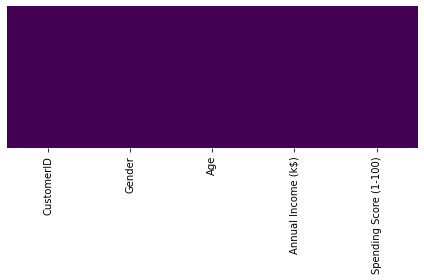

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [ ]:
#default axis=0 which is rows, axis=1 which is columns
df=df.drop(['CustomerID'],axis=1)

In [ ]:
#null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

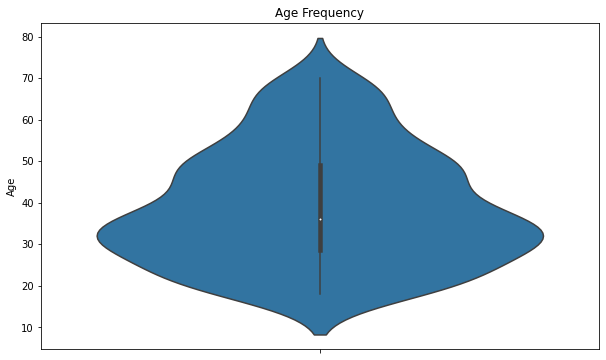

In [ ]:
#visualise the distribution
#plot the age frequency of customers- violin plot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.violinplot(y=df["Age"])
plt.title('Age Frequency')
plt.show()

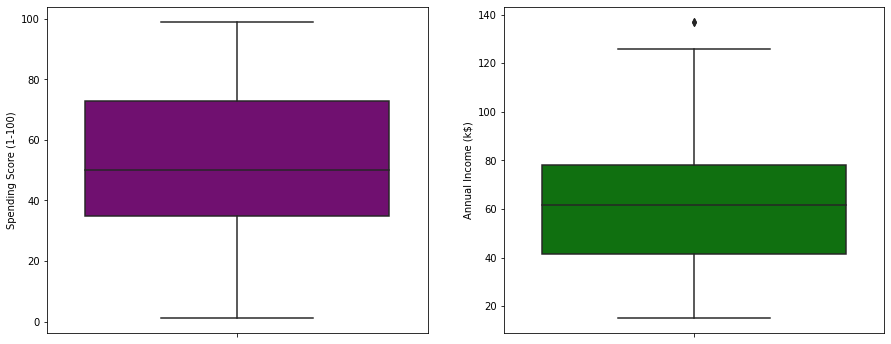

In [ ]:
#box plot- of spending score and annual income to better visualize the distribution range
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"],color="purple")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color="green")

In [ ]:
'''gender=df.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index,y=genders.values)   #index={Female, Male}- x axis, Genders={age values}- Y axis'''


'gender=df.Gender.value_counts()\nplt.figure(figsize=(10,4))\nsns.barplot(x=genders.index,y=genders.values)   #index={Female, Male}- x axis, Genders={age values}- Y axis'

In [ ]:
df["Age"]

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

Filter the dataFrame

In [ ]:
dataframe[(dataframe['Age']==22) & dataframe['Stream'].isin(options)]

In [ ]:
df['Age'][(df["Age"]>=18) & (df["Age"]<=25)]

0      19
1      21
2      20
3      23
5      22
7      23
13     24
15     22
17     20
21     25
29     23
31     21
33     18
35     21
39     20
41     24
45     24
61     19
65     18
68     19
78     23
84     21
87     22
91     18
95     24
99     20
100    23
105    21
111    19
113    19
114    18
115    19
124    23
132    25
134    20
138    19
144    25
162    19
Name: Age, dtype: int64

In [ ]:
#make a bar plot to check the distribution of number of customers in each group
age18_25 =df['Age'][(df["Age"]>=18) & (df["Age"]<=25)]
age26_35 =df['Age'][(df["Age"]>=26) & (df["Age"]<=35)]
age36_45 =df['Age'][(df["Age"]>=36) & (df["Age"]<=45)]
age46_55 =df['Age'][(df["Age"]>=46) & (df["Age"]<=55)]
age55above =df['Age'][(df["Age"]>=55)]

In [ ]:
len(age18_25)

38

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of Customers')

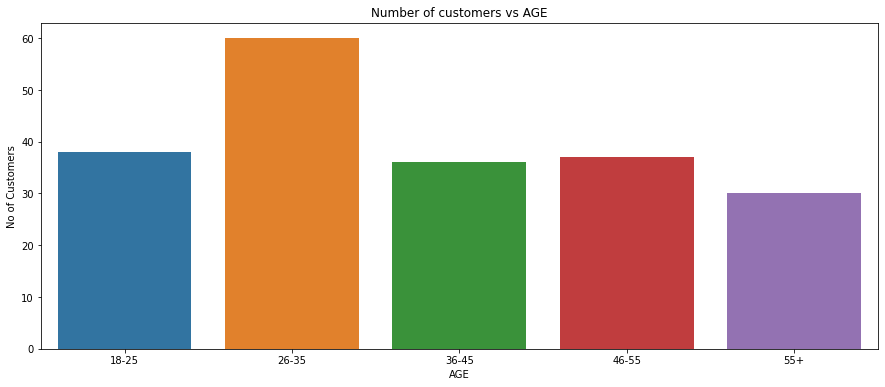

In [ ]:
x=["18-25","26-35","36-45","46-55","55+"]
y=[len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age55above)]
plt.figure(figsize=(15,6))
plt.title('Number of customers vs AGE')
sns.barplot(x,y)
plt.xlabel("AGE")
plt.ylabel("No of Customers")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
#lets visualise the no of customers according to their spending scores

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of Customers')

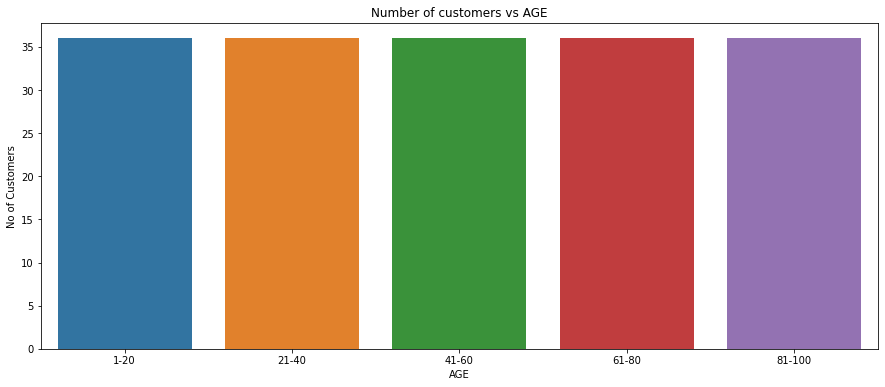

In [ ]:
ss1_20= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
x=["1-20","21-40","41-60","61-80","81-100"]
y=[len(ss1_20),len(ss21_40),len(ss41_60),len(ss61_80),len(ss81_100)]
plt.figure(figsize=(15,6))
plt.title('Number of customers vs AGE')
sns.barplot(x,y)
plt.xlabel("AGE")
plt.ylabel("No of Customers")

#synopsis: Majority of the customers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


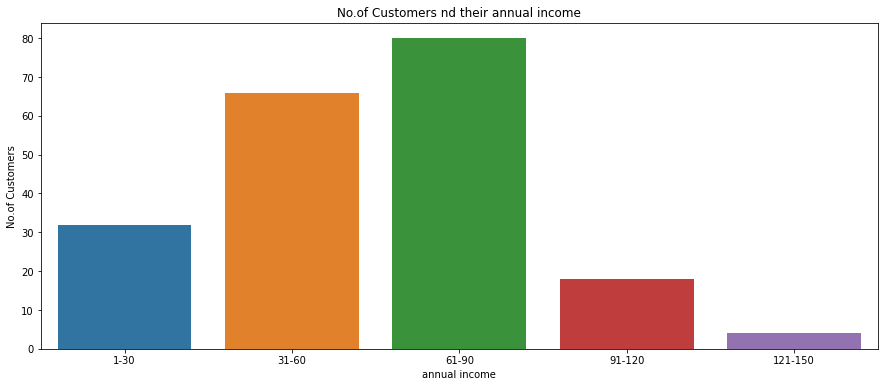

In [ ]:
ai1_30 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=1)&(df["Annual Income (k$)"]<=30)]
ai31_60 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)]
ai61_90 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)]
ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)]
ai121_150 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]
x=["1-30","31-60","61-90","91-120","121-150"]
y=[len(ai1_30),len(ai31_60 ),len(ai61_90),len(ai91_120),len(ai121_150)]
plt.figure(figsize=(15,6))
sns.barplot(x,y)
plt.title("No.of Customers nd their annual income")
plt.xlabel("annual income")
plt.ylabel("No.of Customers")
plt.show()

In [ ]:

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.iloc[:,-3:0]

""
0
1
2
3
4
...
195
196
197
198


In [ ]:
#unsupervised
#training the model
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=2)
clusters=km.fit_predict(df.iloc[:,-3:])

In [ ]:
df["label"]=clusters

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


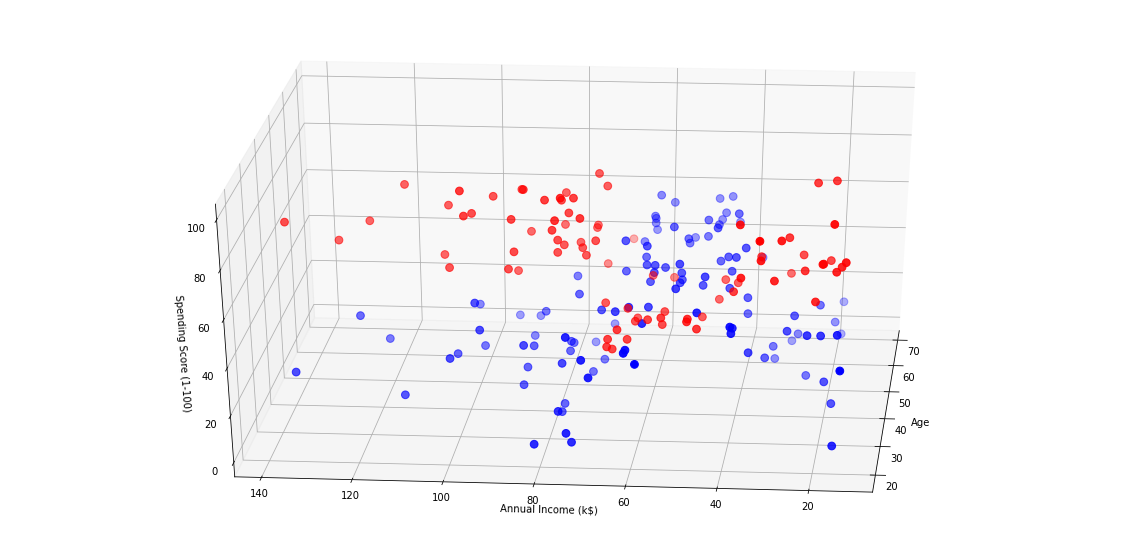

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

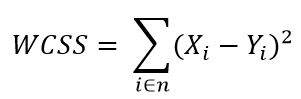

---> plotted Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

---> where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

The Elbow Method

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The steps can be summarized in the below steps:

1--> Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.

2--> For each K, calculate the total within-cluster sum of square (WCSS).

3--> Plot the curve of WCSS vs the number of clusters K.

4--> The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

[270030.15499999997, 181412.2575757576, 106377.16981007869, 73704.62903948833, 44465.344336822585, 37288.68623658949, 31623.631872294376, 25079.449952402672, 22869.172871572868, 19739.459126411843]


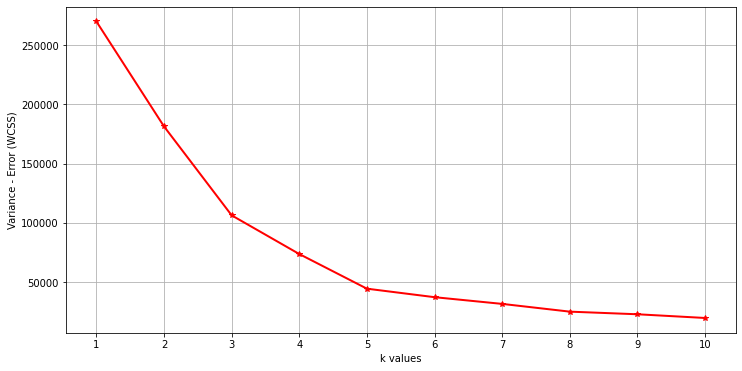

In [ ]:
#Elbow point - To find the optimal k value
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(df.iloc[:,-3:])
  wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="*")
plt.xlabel("k values")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Variance - Error (WCSS)")
plt.show()

#SYNOPSIS: The optimal k cluster value is 5

In [ ]:
from sklearn.cluster import KMeans
#Train our model
km =KMeans(n_clusters=5)
clusters=km.fit_predict(df.iloc[:,-3:])

In [ ]:
df["label"] = clusters
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,2


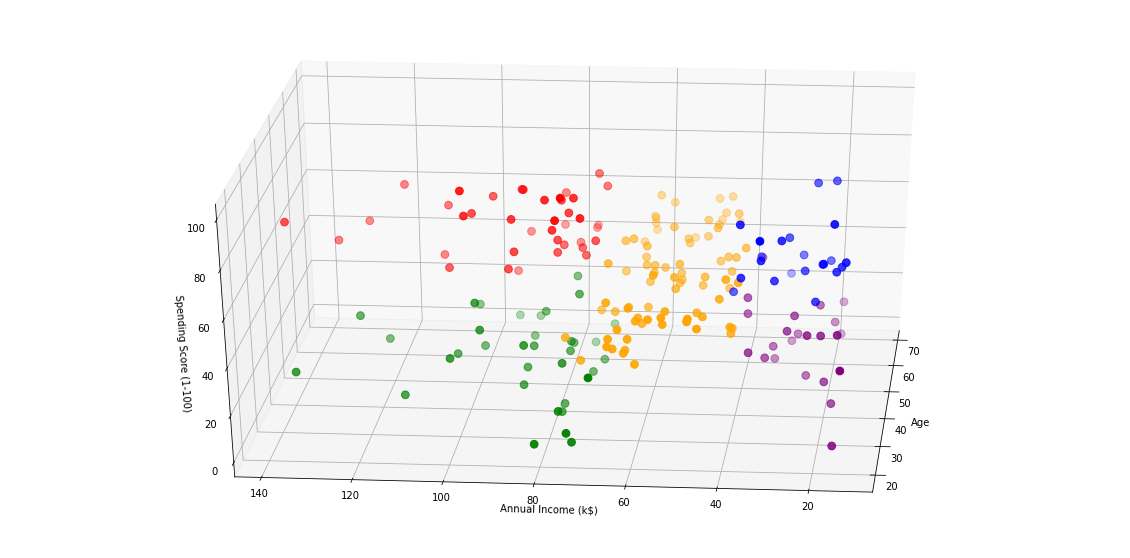

In [ ]:
#3D plot to visualize the spending scores of customers with their annual income., age   - to see clustered points
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
#User -   Predicting the Cluster of new customer - membership card
age = int(input("Enter Age:"))
anual_income = int(input("Enter Annual Income of customer: "))
spend_score = int(input("Enter Spending Score:"))
res_cluster = km.predict([[age,anual_income,spend_score]])

Enter Age:20
Enter Annual Income of customer: 20
Enter Spending Score:45


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("Cluster: ",res_cluster[0])